In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x_train = train_path = '/content/drive/MyDrive/dataset/Training_Set'
x_test = test_path = '/content/drive/MyDrive/dataset/Test_Set'

In [ ]:
x_train = x_test = ImageDataGenerator(rescale=1/255)

train_batches = x_train.flow_from_directory( train_path, target_size=(224, 224),
                                               batch_size=10, class_mode='categorical')

test_batches = x_test.flow_from_directory(test_path, target_size=(224, 224),
                                                batch_size=10, class_mode='categorical')


Found 25498 images belonging to 15 classes.
Found 4500 images belonging to 15 classes.


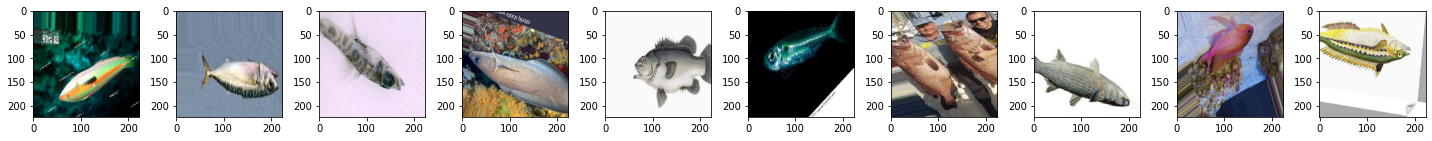

In [ ]:
imgs, labels = next(test_batches)
fig, axes = plt.subplots(1, 10, figsize=(20,20))
axes = axes.flatten()

for i, ax in zip( imgs, axes):
  ax.imshow(i)
plt.tight_layout()
plt.show()

In [ ]:
model=Sequential([                  
                  Conv2D(32, (3,3), activation='relu', padding = 'same', input_shape=(224,224,3)),
                  MaxPool2D(pool_size=(2,2)),

                  Conv2D(64, (3,3), activation='relu', padding = 'same'),
                  MaxPool2D(pool_size=(2, 2)),

                  Conv2D(128, (3,3), activation='relu', padding = 'same'),
                  MaxPool2D(pool_size=(2, 2)),
                  Dropout(0.2),

                  Conv2D(128, (3,3), activation='relu', padding = 'same'),
                  Flatten(), Dropout(0.5),
                  Dense(units=15, activation='softmax') ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [ ]:
model.compile(optimizer = Adam(learning_rate=0.0005),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x=train_batches, steps_per_epoch=len(train_batches), 
                    validation_data=test_batches, epochs=10, verbose=1)

Epoch 1/10
1023/2550 [===========>..................] - ETA: 2:02 - loss: 1.5267 - accuracy: 0.5019

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


2550/2550 [==============================] - 1218s 478ms/step - loss: 1.4358 - accuracy: 0.5319 - val_loss: 1.3215 - val_accuracy: 0.5716
Epoch 2/10
2550/2550 [==============================] - 234s 92ms/step - loss: 1.0113 - accuracy: 0.6721 - val_loss: 1.0502 - val_accuracy: 0.6600
Epoch 3/10
2550/2550 [==============================] - 236s 93ms/step - loss: 0.7018 - accuracy: 0.7736 - val_loss: 1.0197 - val_accuracy: 0.6720
Epoch 4/10
2550/2550 [==============================] - 234s 92ms/step - loss: 0.4805 - accuracy: 0.8458 - val_loss: 0.8135 - val_accuracy: 0.7493
Epoch 5/10
2550/2550 [==============================] - 232s 91ms/step - loss: 0.3678 - accuracy: 0.8817 - val_loss: 1.0905 - val_accuracy: 0.6989
Epoch 6/10
2550/2550 [==============================] - 233s 92ms/step - loss: 0.2809 - accuracy: 0.9083 - val_loss: 0.9355 - val_accuracy: 0.7567
Epoch 7/10
2550/2550 [==============================] - 236s 92ms/step - loss: 0.2337 - accuracy: 0.9249 - val_loss: 0.9221 - v

In [ ]:
model.save('fish_AI.h5')

In [ ]:
classify = load_model('fish_AI.h5')
dic = train_batches.class_indices
dic

{'Anthias anthias': 0,
 'Atherinomorus lacunosus': 1,
 'Belone belone': 2,
 'Boops boops': 3,
 'Chlorophthalmus agassizi': 4,
 'Coris julis': 5,
 'Dasyatis centroura': 6,
 'Epinephelus caninus': 7,
 'Gobius niger': 8,
 'Mugil cephalus': 9,
 'Phycis phycis': 10,
 'Polyprion americanus': 11,
 'Pseudocaranx dentex': 12,
 'Rhinobatos cemiculus': 13,
 'Scomber japonicus': 14}

fish Classification Result: ['Anthias anthias']


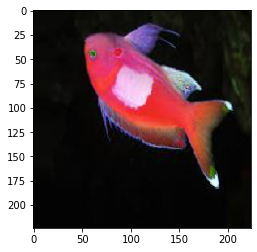

In [ ]:
sample = load_img('/content/ca_1AnthiasAnthias.jpg', target_size =(224,224))
plt.imshow(sample)
sample = img_to_array(sample)
sample = sample.reshape(1,224,224,3)
sample = sample.astype('float32')
sample = sample/255

result = np.argmax(classify.predict(sample),axis= 1)
key = [k for k, v in dic.items() if v == result]
print('fish Classification Result:', key)